# Mini Project 5: World Democracy and Freedom

### Learning Objective
Gaining experience in data preparation, unsupervised machine learning analysis, and visualisation of clusters.

### Project Objective
For the last 50 years the organisation Freedom House (https://freedomhouse.org) monitors and protects the democracy values, political rights and civil liberties in the world. We would like to get insights about the status of freedom of all countries in 2023.

## Tasks

### 1. Research the work of Freedom House and choose some of their data collections, relevant to the objective.

In [ ]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [77]:
df = pd.read_csv('/Users/emiliocastrolagunas/Desktop/Sem4/BI/Notebooks/Data/freedom.csv')
#df= pd.read_csv('../excercises/Data/freedom.csv')



In [78]:
#idea of general looks of data
df.head()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5


In [79]:
df.shape

(193, 48)

In [80]:
#checking for null-values
df.isnull().sum()

country      0
1972        51
1973        50
1974        48
1975        42
1976        41
1977        45
1978        42
1979        39
1980        38
1981        36
1982       193
1983        35
1984        34
1985        34
1986        34
1987        34
1988        34
1989        33
1990        33
1991        14
1992        10
1993         5
1994         4
1995         4
1996         4
1997         4
1998         4
1999         3
2000         3
2001         3
2002         3
2003         3
2004         3
2005         3
2006         1
2007         1
2008         1
2009         1
2010         1
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
dtype: int64

### 2. Clean and explore the data and prepare it for clustering


In [81]:
def replace_zeros_and_nulls_with_median(df, column_name):
    non_zero_non_null_values = df[column_name][(df[column_name] != 0) & (~df[column_name].isnull())]
    if not non_zero_non_null_values.empty:
        median_value = non_zero_non_null_values.median()
        df[column_name].fillna(median_value, inplace=True)
    return df

In [82]:
years_with_null=['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
years_with_null

['1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010']

In [83]:
for year_string in years_with_null:
     replace_zeros_and_nulls_with_median(df, year_string)
        
df.isnull().sum()

country      0
1972         0
1973         0
1974         0
1975         0
1976         0
1977         0
1978         0
1979         0
1980         0
1981         0
1982       193
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
dtype: int64

In [84]:
#1982 cannot be standardized as there's not any data from this year. Might be best to remove this row
print(df.head())
print(df['1982'])

       country  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...  \
0  Afghanistan   4.5   6.5   6.5   6.5   6.5   6.0   7.0  7.00   7.0  ...   
1      Albania   7.0   7.0   7.0   7.0   7.0   7.0   7.0  7.00   7.0  ...   
2      Algeria   6.0   6.0   6.0   6.5   6.0   6.0   6.0  6.00   6.0  ...   
3      Andorra   3.5   4.0   4.0   4.0   4.0   5.0   5.0  4.75   5.0  ...   
4       Angola   5.0   5.0   5.0   6.0   6.0   7.0   7.0  7.00   7.0  ...   

   2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   5.5   5.5  
1   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  
2   5.5   5.5   5.5   5.5   5.5   5.5   5.5   5.5   5.5   5.5  
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
4   5.5   5.5   5.5   5.5   5.5   5.5   6.0   6.0   6.0   5.5  

[5 rows x 48 columns]
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
188   NaN
189   NaN
190   NaN
191   NaN
192   NaN
Name: 1982, Length: 

In [89]:
df = df.drop('1982', axis=1)



KeyError: "['1982'] not found in axis"

In [91]:
df=df.drop('country',axis=1)

KeyError: "['country'] not found in axis"

### 3. Choose an unsupervised ML algorithm and apply it to create clusters of countries, based on their freedom assessment measure.

In [92]:
X = df.values
X = X[:,1:]
print(X)

[[6.5 6.5 6.5 ... 6.  5.5 5.5]
 [7.  7.  7.  ... 3.  3.  3. ]
 [6.  6.  6.5 ... 5.5 5.5 5.5]
 ...
 [6.  6.  6.3 ... 6.5 6.5 6.5]
 [5.  4.5 5.  ... 4.  4.  4. ]
 [5.5 5.5 5.5 ... 5.  5.5 5. ]]


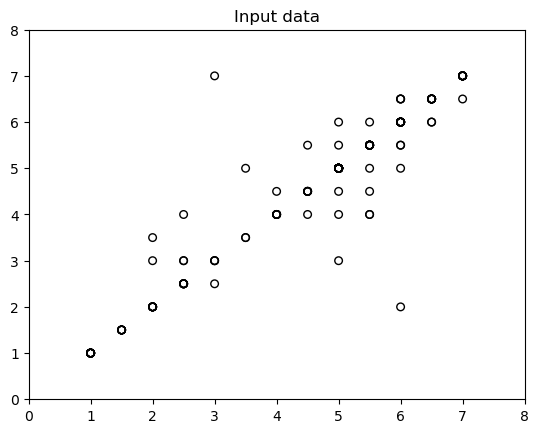

In [93]:
# Plot the input data
# a. creates a frame
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:,0].min()
x_max = X[:,0].max()

# second column
y_min = X[:,1].min()
y_max = X[:,1].max()

# same as above: get the range of X and Y (shorter way)
# x_min, x_max = X[:,0].min(), X[:,0].max()
# y_min, y_max = X[:,1].min(), X[:,1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# scatterplot of the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

In [94]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Distortion:  [8.119628567872846, 6.628004971825703, 5.830403553140722, 5.438340744185515, 5.180014841558819, 4.845797269031011, 4.70695688144691, 4.522761411702097]


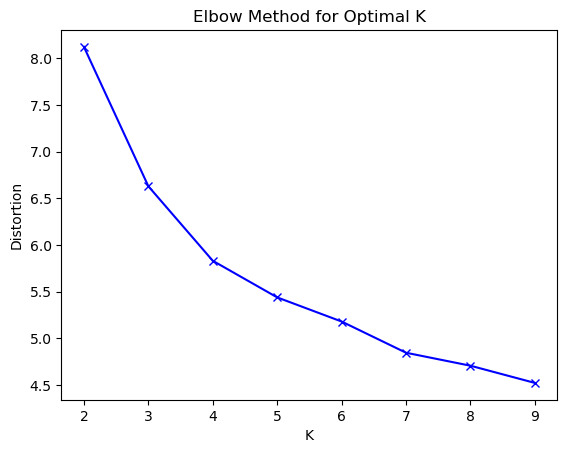

In [95]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [96]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 2
Silhouette score = 0.45200335414222037


C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 3
Silhouette score = 0.38628534729670877


C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 4
Silhouette score = 0.35755417874185585


C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 5
Silhouette score = 0.3539445725630724


C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 6
Silhouette score = 0.3085446199589375


C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 7
Silhouette score = 0.2969723611795014


C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 8
Silhouette score = 0.2961240330171507


C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 9
Silhouette score = 0.27777295992303347


In [98]:
num_clusters=3

In [99]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [100]:
# Train the KMeans clustering model
kmeans.fit(X)

C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=20)

In [101]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

array([1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0,
       2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1,
       2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2,
       1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1])

In [102]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

[1 0 1 0 1 0 0 1 2 2 1 2 1 0 2 1 2 2 0 1 0 0 2 0 1 0 1 1 1 1 2 0 1 1 0 1 0
 0 1 1 2 1 0 1 2 0 2 1 2 2 0 1 0 1 1 0 1 1 0 2 2 1 1 0 2 0 2 2 0 1 1 0 1 0
 0 2 2 0 1 1 2 2 2 2 2 1 1 1 2 1 1 1 0 1 0 1 1 0 0 2 0 0 0 1 0 2 0 1 2 0 0
 0 0 0 0 1 0 1 0 2 0 2 2 0 1 1 1 0 2 1 1 0 0 2 0 0 0 0 2 1 0 1 1 2 0 0 1 0
 0 0 0 1 0 0 2 1 0 0 0 2 0 2 2 2 1 0 2 2 1 1 0 0 0 1 0 2 1 0 1 2 1 0 1 2 2
 0 1 0 2 1 1 0 1]


Cluster  0 :  (76, 45)


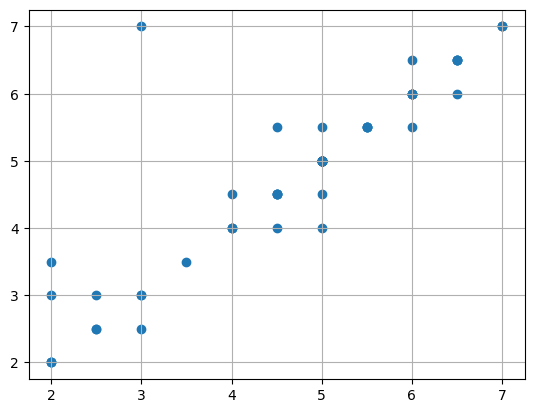

Cluster  1 :  (69, 45)


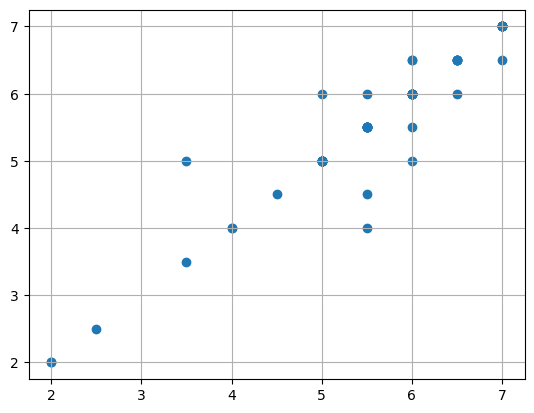

Cluster  2 :  (48, 45)


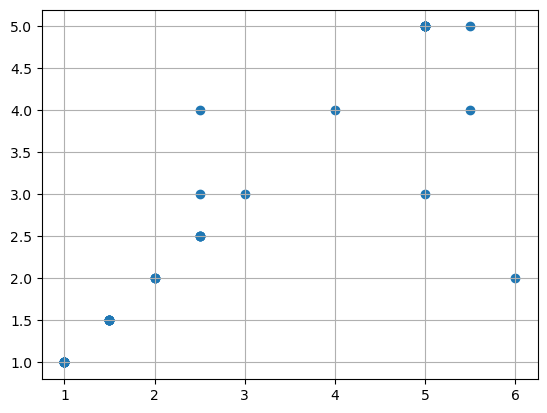

In [103]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

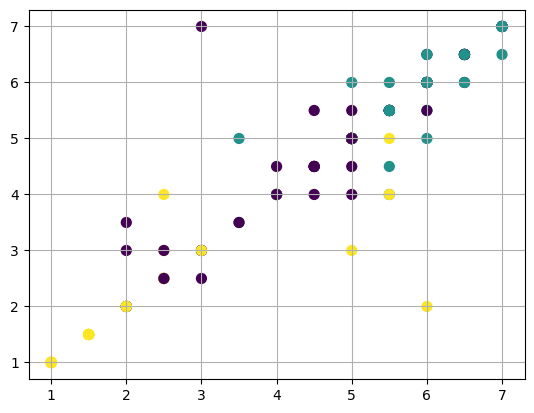

In [104]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [105]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[4.78289474 4.86184211 4.79605263 4.88157895 4.97368421 4.94078947
  4.76973684 4.89473684 4.90131579 4.86184211 4.82236842 4.60526316
  4.55921053 4.53947368 4.46710526 4.38157895 3.96052632 3.45394737
  3.29605263 3.23684211 3.11842105 3.02631579 2.875      2.89473684
  2.81578947 2.81578947 2.73026316 2.70394737 2.57894737 2.50657895
  2.44078947 2.38815789 2.42105263 2.46052632 2.46052632 2.49342105
  2.48026316 2.51973684 2.51973684 2.5        2.51315789 2.51973684
  2.59210526 2.59210526 2.69078947]
 [5.51449275 5.5        5.69275362 5.68550725 5.6057971  5.60869565
  5.52536232 5.57971014 5.63768116 5.65217391 5.73913043 5.67391304
  5.66666667 5.65942029 5.61594203 5.68115942 5.54347826 5.53623188
  5.49275362 5.73188406 5.79710145 5.77536232 5.8115942  5.78985507
  5.69565217 5.70289855 5.71014493 5.71014493 5.63043478 5.5942029
  5.55072464 5.46376812 5.44202899 5.45652174 5.46376812 5.52173913
  5.52898551 5.5        5.50724638 5.49275362 5.56521739 5.58695652
  5.60869565 

### 4. Create a geographical map of the world and colours the countries on it to reflect on their freedom status (cluster).